# Import Libraries

In [9]:
!pip install japanize_matplotlib

In [10]:
# DATA MANIPULTION
import pandas as pd
import numpy as np

# DATA VIZ
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# STATS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# MACHINE LEARNING
## PREPROCESSING
from sklearn.impute import SimpleImputer, KNNImputer
## MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score
## SCALERS
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
## CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
## EVALUATION
from sklearn.metrics import accuracy_score, recall_score, precision_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
## MODEL TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Dataset

In [11]:
import sys

# set max columns display
pd.options.display.max_columns = 50

def is_running_in_colab():
    return 'google.colab' in sys.modules

if is_running_in_colab():
    print("Running in Google Colab")
    
    # allow colab to access drive
    from google.colab import drive
    drive.mount('/content/drive')
    
    # set link to dataset
    file_id = '1fkhfkbUXoBexJAAnI7q-kTQC2CUmHW3J'
    url = 'https://drive.google.com/uc?id={}'.format(file_id)

    df = pd.read_excel(url)
else:
    print("Not running in Google Colab")
    df = pd.read_excel('8WS2_ver2.xlsx')

Not running in Google Colab


In [12]:
df.head(2)

,従業員番号,離職,年齢,部署,役職,職位,性別,配偶者状況,業績評価,勤続年数,学歴,修学分野,業務経験年数,前年度研修参加回数,現職位経験年数,前回昇進からの経過年数,現管理者との業務年数,転職回数,出張頻度,通勤距離(km),ワークライフバランス,環境満足度,業務関与度,業務満足度,関係性満足度,標準業務時間,月収,給与上昇率,ストックオプションレベル,月勤務時間,残業時間,有給長期休暇利用開始日,有給長期休暇利用終了日
0,1,Yes,41,Sales,Sales Executive,2,Female,Single,3,6,2,Life Sciences,8,0,4,0,5,8,Travel_Rarely,1,1,2,3,4,1,8,5993,11,0,147,OverTimePay: 38,2015年10月16日,2015年10月17日
1,2,No,49,Research & Development,Research Scientist,2,Male,Married,4,10,1,Life Sciences,10,3,7,1,7,1,Travel_Frequently,8,3,3,2,2,4,8,5130,23,1,176,OverTimePay: 2,2015年6月28日,2015年7月2日


In [13]:
column_mapping = {
    '従業員番号': 'Employee ID',
    '離職': 'Resignation',
    '年齢': 'Age',
    '部署': 'Department',
    '役職': 'Position',
    '職位': 'Position Rank',
    '性別': 'Gender',
    '配偶者状況': 'Marital Status',
    '業績評価': 'Performance Rating',
    '勤続年数': 'Years of Service',
    '学歴': 'Education',
    '修学分野': 'Field of Study',
    '業務経験年数': 'Years of Experience',
    '前年度研修参加回数': 'Training Participation Last Year',
    '現職位経験年数': 'Years in Current Position',
    '前回昇進からの経過年数': 'Years Since Last Promotion',
    '現管理者との業務年数': 'Years with Current Manager',
    '転職回数': 'Number of Job Changes',
    '出張頻度': 'Business Travel Frequency',
    '通勤距離(km)': 'Commute Distance (km)',
    'ワークライフバランス': 'Work-Life Balance',
    '環境満足度': 'Job Environment Satisfaction',
    '業務関与度': 'Job Involvement',
    '業務満足度': 'Job Satisfaction',
    '関係性満足度': 'Relationship Satisfaction',
    '標準業務時間': 'Standard Hours',
    '月収': 'Monthly Income',
    '給与上昇率': 'Salary Hike Rate',
    'ストックオプションレベル': 'Stock Option Level',
    '月勤務時間': 'Monthly Working Hours',
    '残業時間': 'Overtime Hours',
    '有給長期休暇利用開始日': 'Paid Long Vacation Start Date',
    '有給長期休暇利用終了日': 'Paid Long Vacation End Date'
}

df = df.rename(columns=column_mapping)
df.columns

Index(['Employee ID', 'Resignation', 'Age', 'Department', 'Position',
       'Position Rank', 'Gender', 'Marital Status', 'Performance Rating',
       'Years of Service', 'Education', 'Field of Study',
       'Years of Experience', 'Training Participation Last Year',
       'Years in Current Position', 'Years Since Last Promotion',
       'Years with Current Manager', 'Number of Job Changes',
       'Business Travel Frequency', 'Commute Distance (km)',
       'Work-Life Balance', 'Job Environment Satisfaction', 'Job Involvement',
       'Job Satisfaction', 'Relationship Satisfaction', 'Standard Hours',
       'Monthly Income', 'Salary Hike Rate', 'Stock Option Level',
       'Monthly Working Hours', 'Overtime Hours',
       'Paid Long Vacation Start Date', 'Paid Long Vacation End Date'],
      dtype='object')

In [14]:
df.shape

(1470, 33)

In [15]:
df.dtypes.value_counts()

int64     23
object    10
dtype: int64

In [16]:
df.select_dtypes(include='object').columns

Index(['Resignation', 'Department', 'Position', 'Gender', 'Marital Status',
       'Field of Study', 'Business Travel Frequency', 'Overtime Hours',
       'Paid Long Vacation Start Date', 'Paid Long Vacation End Date'],
      dtype='object')

In [17]:
df['Resignation'].value_counts()

No     1233
Yes     237
Name: Resignation, dtype: int64

# Data Prep

In [18]:
print(f'There are {df.isnull().sum().sum()} null values')
print(f'There are {df.duplicated().sum()} duplicated rows')

if df.isnull().sum().sum() + df.duplicated().sum() == 0:
    print('YAY!')

There are 0 null values
There are 0 duplicated rows
YAY!


# Feature Engineering

- convert categorical -> numerical data

In [19]:
df['Resignation'] = df['Resignation'].apply(lambda x: 0 if x == 'No' else 1)
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

In [20]:
df['Business Travel Frequency'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: Business Travel Frequency, dtype: int64

In [21]:
df['Business Travel Frequency'] = df['Business Travel Frequency'].apply(lambda x: 0 if x =='Non-Travel' else (1 if x == 'Travel_Rarely' else 2))

In [22]:
import re

df['Overtime Hours'] = df['Overtime Hours'].apply(lambda x: re.sub(r'\D', '', str(x)))
df['Overtime Hours'] = df['Overtime Hours'].astype('int')

In [23]:
df['Marital Status'] = df['Marital Status'].apply(lambda x: 0 if x =='Single' else (1 if x == 'Divorced' else 2))

In [24]:
import datetime

df['Paid Long Vacation Start Date'] = pd.to_datetime(df['Paid Long Vacation Start Date'], format='%Y年%m月%d日')
df['Paid Long Vacation End Date'] = pd.to_datetime(df['Paid Long Vacation End Date'], format='%Y年%m月%d日')
df['Long Vacation'] = (df['Paid Long Vacation End Date'] - df['Paid Long Vacation Start Date']).dt.days

# EDA

In [25]:
df.dtypes

Employee ID                                  int64
Resignation                                  int64
Age                                          int64
Department                                  object
Position                                    object
Position Rank                                int64
Gender                                       int64
Marital Status                               int64
Performance Rating                           int64
Years of Service                             int64
Education                                    int64
Field of Study                              object
Years of Experience                          int64
Training Participation Last Year             int64
Years in Current Position                    int64
Years Since Last Promotion                   int64
Years with Current Manager                   int64
Number of Job Changes                        int64
Business Travel Frequency                    int64
Commute Distance (km)          

In [26]:
df.head()

,Employee ID,Resignation,Age,Department,Position,Position Rank,Gender,Marital Status,Performance Rating,Years of Service,Education,Field of Study,Years of Experience,Training Participation Last Year,Years in Current Position,Years Since Last Promotion,Years with Current Manager,Number of Job Changes,Business Travel Frequency,Commute Distance (km),Work-Life Balance,Job Environment Satisfaction,Job Involvement,Job Satisfaction,Relationship Satisfaction,Standard Hours,Monthly Income,Salary Hike Rate,Stock Option Level,Monthly Working Hours,Overtime Hours,Paid Long Vacation Start Date,Paid Long Vacation End Date,Long Vacation
0,1,1,41,Sales,Sales Executive,2,0,0,3,6,2,Life Sciences,8,0,4,0,5,8,1,1,1,2,3,4,1,8,5993,11,0,147,38,2015-10-16,2015-10-17,1
1,2,0,49,Research & Development,Research Scientist,2,1,2,4,10,1,Life Sciences,10,3,7,1,7,1,2,8,3,3,2,2,4,8,5130,23,1,176,2,2015-06-28,2015-07-02,4
2,4,1,37,Research & Development,Laboratory Technician,1,1,0,3,0,2,Other,7,3,0,0,0,6,1,2,3,4,2,3,2,8,2090,15,0,259,4,2015-05-24,2015-05-24,0
3,5,0,33,Research & Development,Research Scientist,1,0,2,3,8,4,Life Sciences,8,3,7,3,0,1,2,3,3,4,3,3,3,8,2909,11,0,229,22,2015-12-12,2015-12-13,1
4,7,0,27,Research & Development,Laboratory Technician,1,1,2,3,2,1,Medical,6,3,2,2,2,9,1,2,3,1,3,2,4,8,3468,12,1,168,0,2015-08-21,2015-08-24,3


# Visualizations

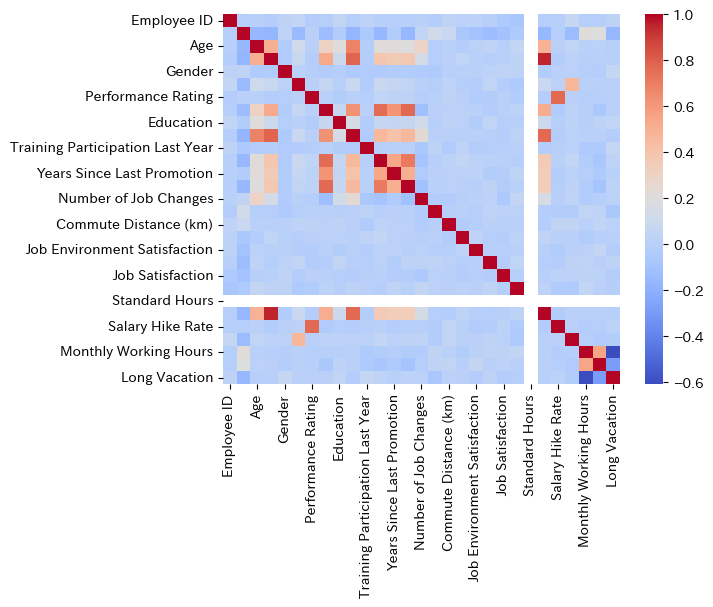

In [27]:
sns.heatmap(df.corr(), cmap='coolwarm');

## Features vs. Turnover

- Check each feature against turnover rate to find patterns

In [28]:
# select columns to check against Turnover
visualize = ['Age',
       'Position Rank', 'Gender', 'Marital Status', 'Performance Rating',
       'Years of Service', 'Education',
       'Years of Experience', 'Training Participation Last Year',
       'Years in Current Position', 'Years Since Last Promotion',
       'Years with Current Manager', 'Number of Job Changes',
       'Business Travel Frequency', 'Commute Distance (km)',
       'Work-Life Balance', 'Job Environment Satisfaction', 'Job Involvement',
       'Job Satisfaction', 'Relationship Satisfaction',
       'Monthly Income', 'Salary Hike Rate', 'Stock Option Level',
       'Monthly Working Hours', 'Overtime Hours',
       'Long Vacation']

# define function to group employees by resignation outcome and compare mean values
def compare_by_turnover(column):
  return df[['Resignation', column]].groupby(['Resignation'], as_index=False).mean().sort_values(by=column, ascending=False)

# loop over each feature
for x in visualize:
  print(compare_by_turnover(x))
  print("*"*40)

   Resignation        Age
0            0  37.561233
1            1  33.607595
****************************************
   Resignation  Position Rank
0            0       2.145985
1            1       1.637131
****************************************
   Resignation    Gender
1            1  0.632911
0            0  0.593674
****************************************
   Resignation  Marital Status
0            0        1.193836
1            1        0.848101
****************************************
   Resignation  Performance Rating
1            1            3.156118
0            0            3.153285
****************************************
   Resignation  Years of Service
0            0          7.369019
1            1          5.130802
****************************************
   Resignation  Education
0            0   2.927007
1            1   2.839662
****************************************
   Resignation  Years of Experience
0            0            11.862936
1            1         

### Comments

- By grouping employees by whether they quit or not, we can see some similarities. On average ,employees who quit:

  - took less/shorter vacations
  - worked more overtime (+6 hours / month)
  - worked more hours (+14 hours / month)
  - shorter/less vacation time (-1.2 days)
  - less Stock option
  - lower income (-2045)
  - lower relationship satisfaction, job satisfaction, job involvement, job environment satisfaction, work-life balance
  - commuted farther (+1.7 km)
  - had more business trips (+.2)

- We can also generalize to say people who quit are more likely to be single, younger, with less work experience, and have changed jobs more often.

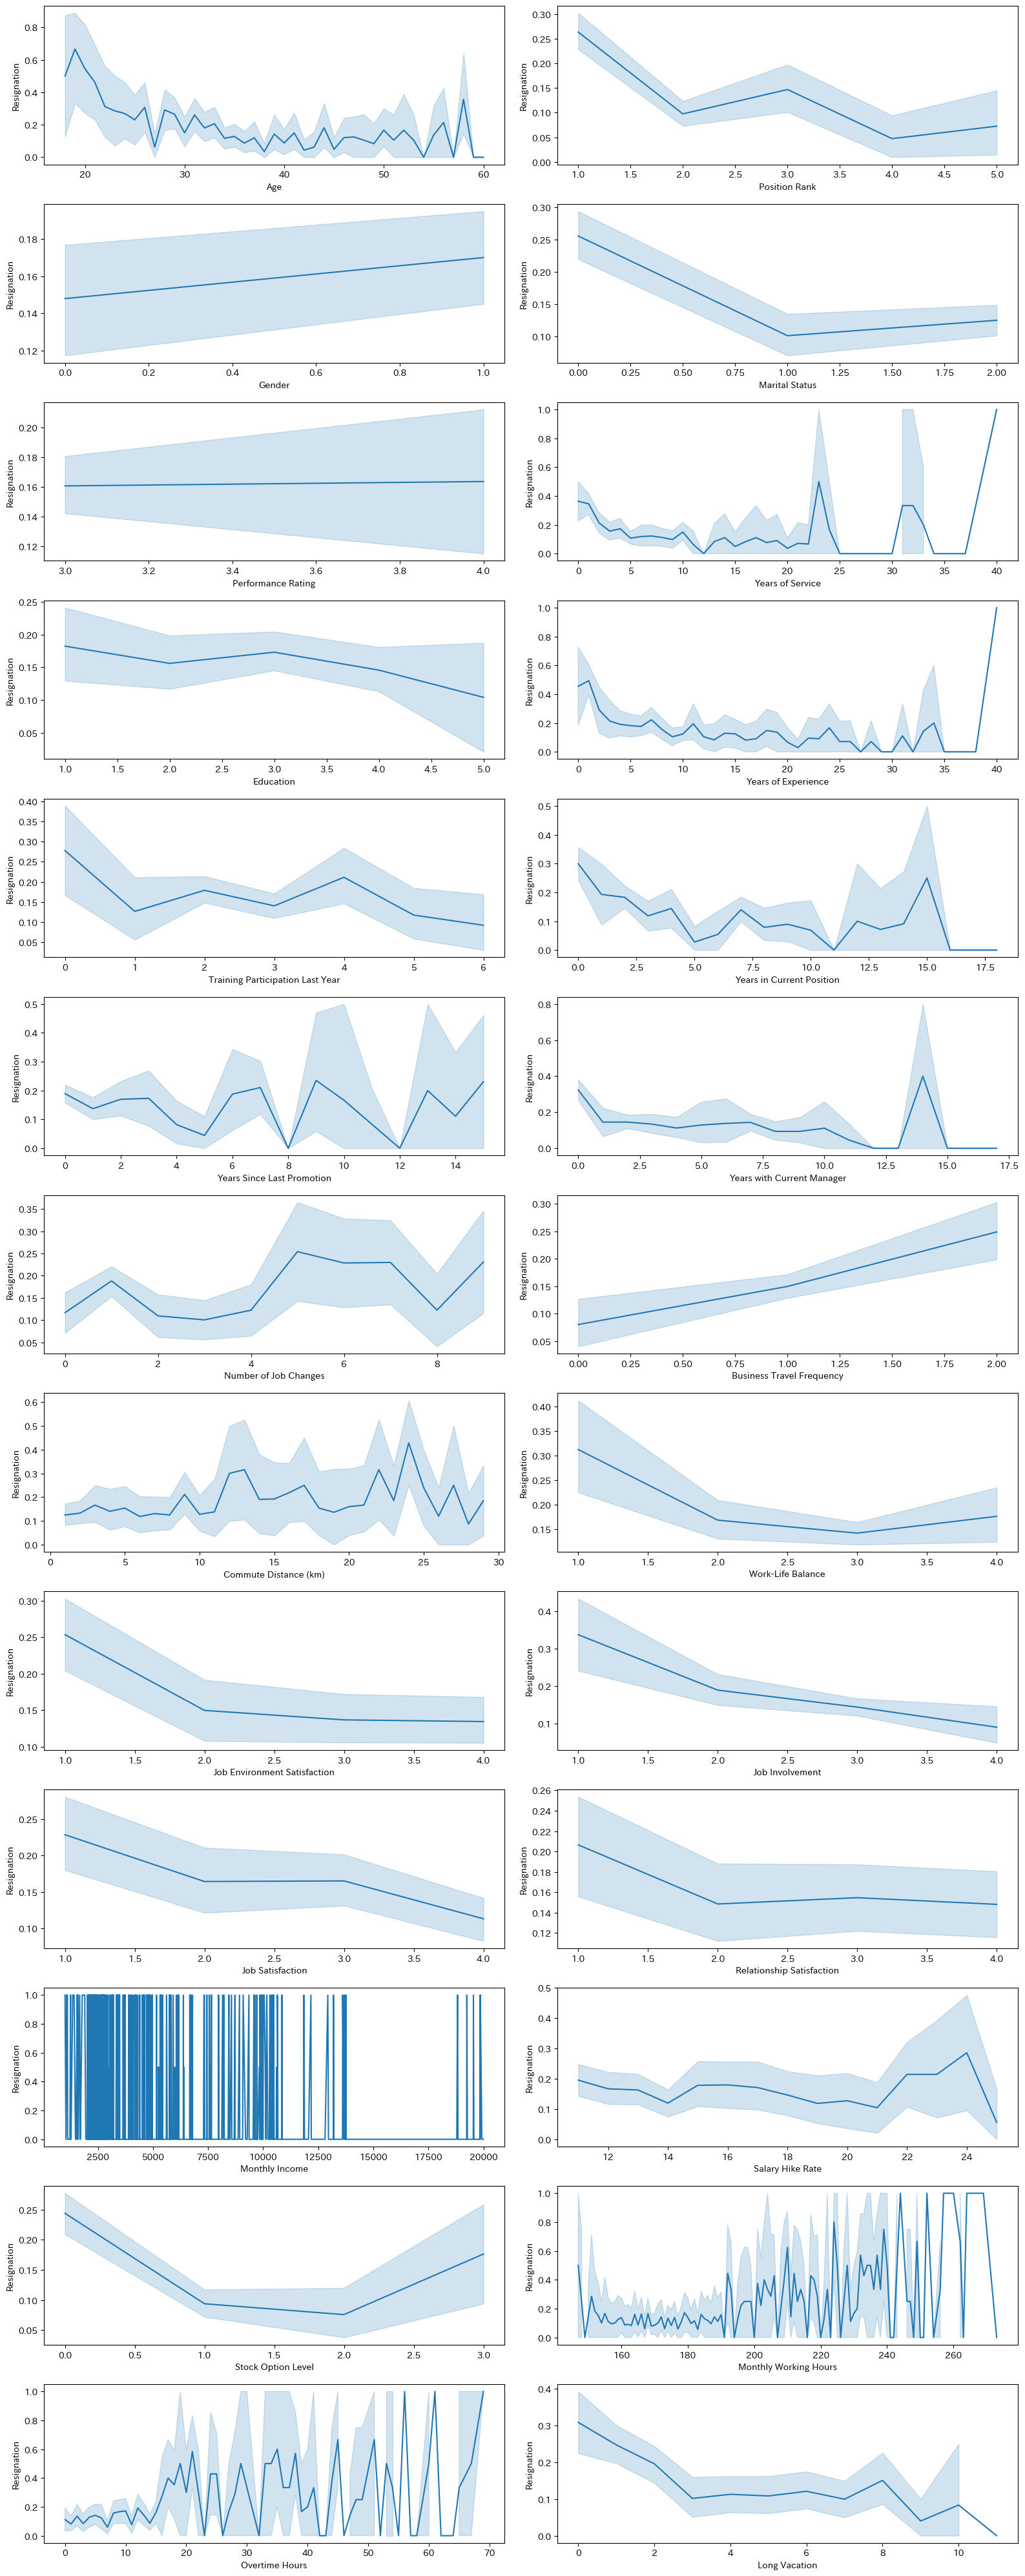

In [29]:
num_plots = len(visualize)
num_rows = (num_plots - 1) // 2 + 1

fig, ax = plt.subplots(num_rows, 2, figsize=(16, 40))

for i, x in enumerate(visualize):
    if i < num_plots:
        row_index = i // 2  # Row index of the subplot
        col_index = i % 2   # Column index of the subplot
        sns.lineplot(data=df, x=x, y='Resignation', ax=ax[row_index, col_index])

# Remove any empty subplots
if num_plots < num_rows * 2:
    for j in range(num_plots, num_rows * 2):
        fig.delaxes(ax[j // 2, j % 2])

plt.tight_layout()
plt.show();

### Comments

The plots show the distribution of people who quit. It echoes the comments above, but we can also see the following trends with people who quit:

- 20-year-olds are most likely to quit, followed by 50-60's, but likely due to retirement
- An employee in a lower position
- Men more likely than women
- Single, followed by Divorced
- new employees, with a spike after 20+ / 30+ years of service
- people with less than 3 years of experience / more than 37 years experience

## Outliers

In [30]:
# Create Functions to deal with outliers

def get_outliers(column_name):
    # Calculate the IQR for the column
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Identify the outliers in the column
    outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]

    # Print the number of outliers
    print(f"Number of outliers in the {column_name} column: {len(outliers)} -- {round(len(outliers)/len(df)*100, 2)}%")

def remove_outliers(column_name):
    df = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]

In [31]:
num_columns = ['Years of Service','Years of Experience', 'Training Participation Last Year',
               'Years in Current Position', 'Years Since Last Promotion','Years with Current Manager',
               'Number of Job Changes', 'Monthly Income', 'Stock Option Level',
               'Monthly Working Hours', 'Overtime Hours']

In [32]:
for x in num_columns:
    get_outliers(x)

Number of outliers in the Years of Service column: 104 -- 7.07%
Number of outliers in the Years of Experience column: 63 -- 4.29%
Number of outliers in the Training Participation Last Year column: 238 -- 16.19%
Number of outliers in the Years in Current Position column: 21 -- 1.43%
Number of outliers in the Years Since Last Promotion column: 107 -- 7.28%
Number of outliers in the Years with Current Manager column: 14 -- 0.95%
Number of outliers in the Number of Job Changes column: 52 -- 3.54%
Number of outliers in the Monthly Income column: 114 -- 7.76%
Number of outliers in the Stock Option Level column: 85 -- 5.78%
Number of outliers in the Monthly Working Hours column: 123 -- 8.37%
Number of outliers in the Overtime Hours column: 118 -- 8.03%


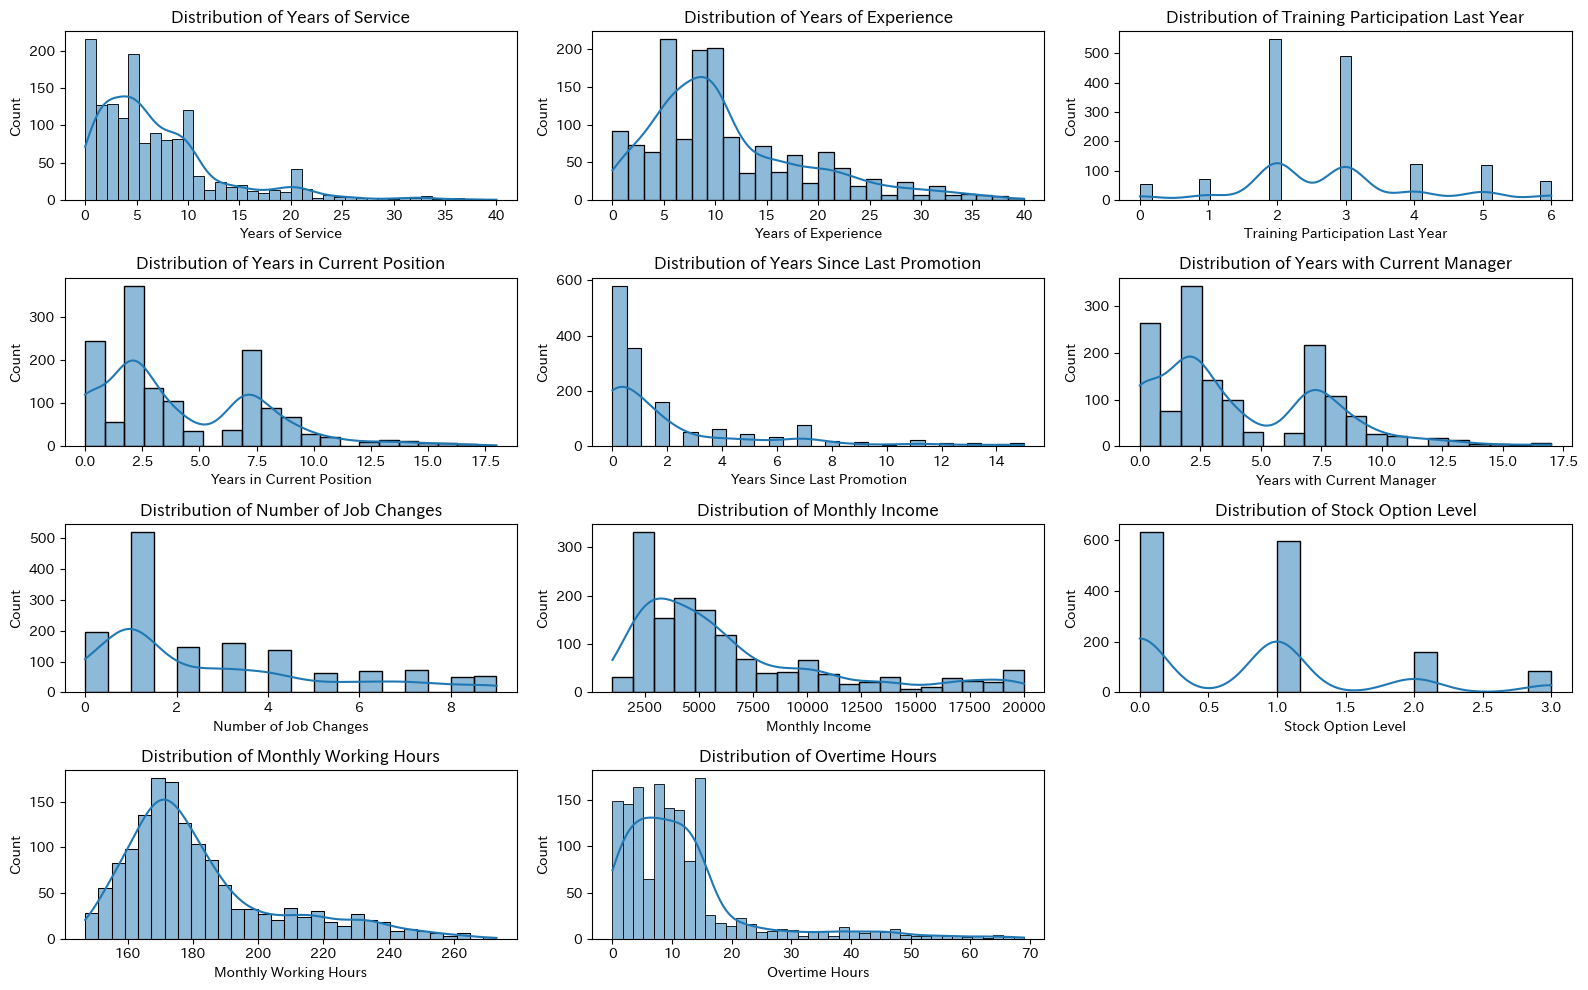

In [33]:
fig, ax = plt.subplots(4, 3, figsize=(16, 10))

num_plots = len(num_columns)
num_rows = (num_plots - 1) // 3 + 1

for i, x in enumerate(num_columns):
    if i < num_plots:
        row_index = i // 3  # Row index of the subplot
        col_index = i % 3   # Column index of the subplot
        ax[row_index, col_index].set_title(f"Distribution of {x}")
        sns.histplot(data=df, x=x, kde=True, ax=ax[row_index, col_index])

# Remove any empty subplots
if num_plots < num_rows * 3:
    for j in range(num_plots, num_rows * 3):
        fig.delaxes(ax[j // 3, j % 3])

plt.tight_layout()
plt.show();

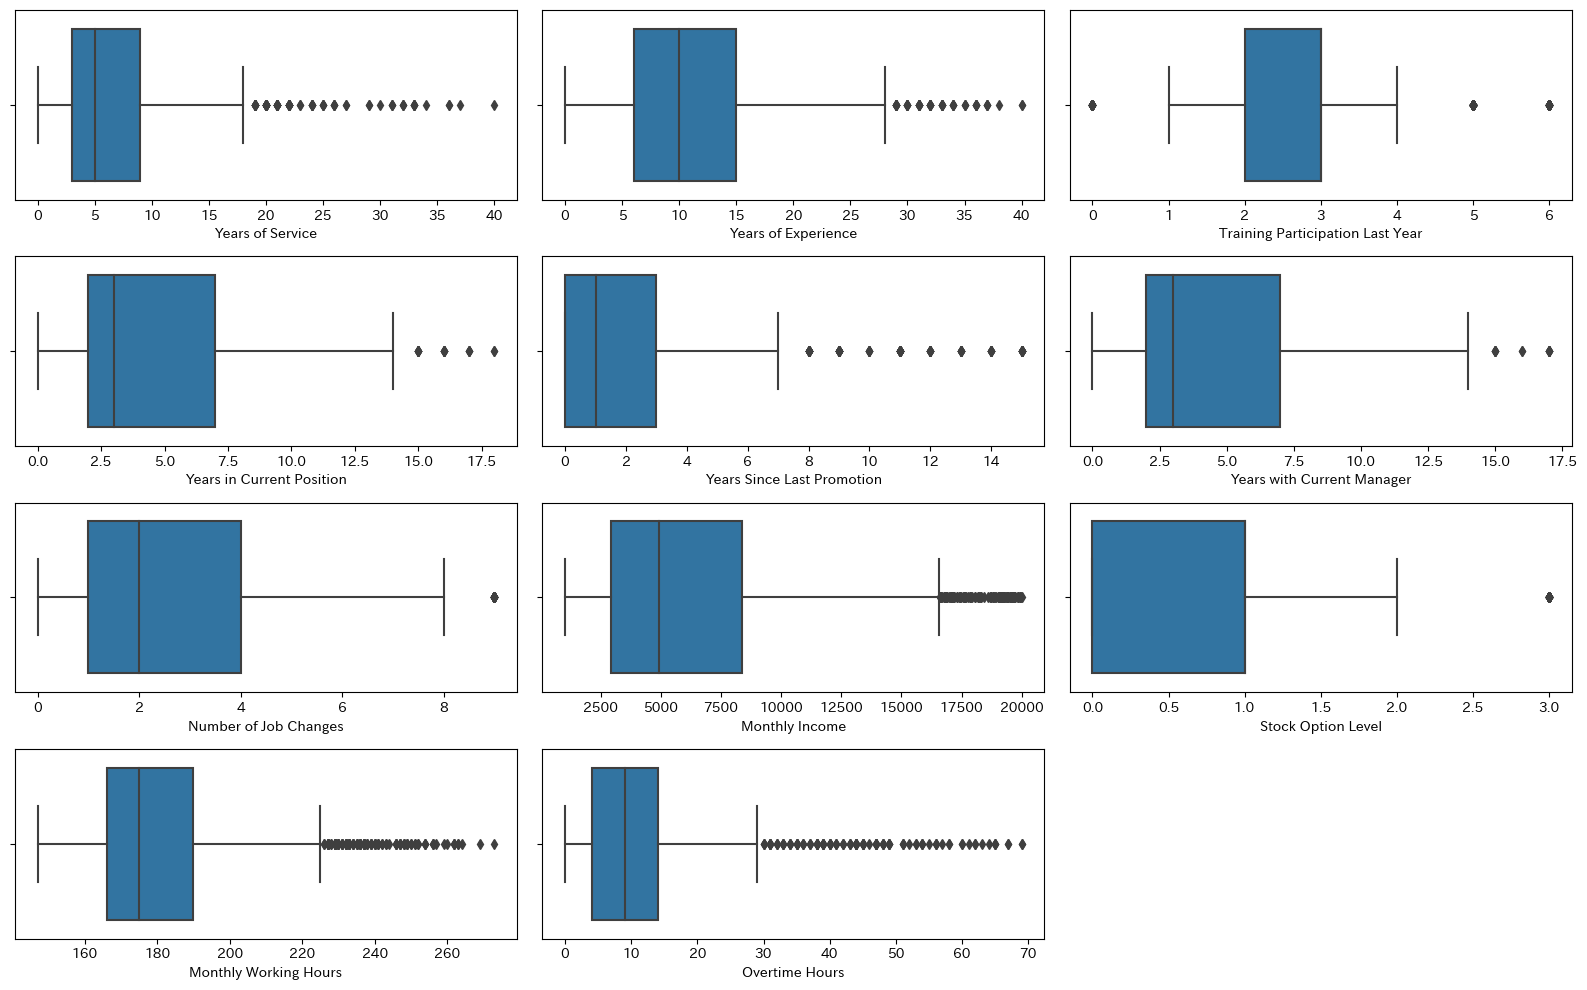

In [34]:
fig, ax = plt.subplots(4, 3, figsize=(16, 10))

num_plots = len(num_columns)
num_rows = (num_plots - 1) // 3 + 1

for i, x in enumerate(num_columns):
    if i < num_plots:
        row_index = i // 3  # Row index of the subplot
        col_index = i % 3   # Column index of the subplot
        sns.boxplot(data=df, x=x, ax=ax[row_index, col_index])

# Remove any empty subplots
if num_plots < num_rows * 3:
    for j in range(num_plots, num_rows * 3):
        fig.delaxes(ax[j // 3, j % 3])

plt.tight_layout()
plt.show();

# Model Steps

## Define Target and Features

In [35]:
y = df['Resignation']

In [36]:
X = df.drop(columns= ['Employee ID', 'Resignation', 'Department', 'Position', 'Field of Study',
                      'Paid Long Vacation Start Date', 'Paid Long Vacation End Date'])

## Train Test Split

In [37]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 27), (441, 27), (1029,), (441,))

## Scale Numerical Features

In [38]:
# group features with outliers for robust scaling
X_treme_train = X_train[['Years of Service','Years of Experience', 'Training Participation Last Year',
               'Years in Current Position', 'Years Since Last Promotion','Years with Current Manager',
               'Number of Job Changes', 'Monthly Income', 'Stock Option Level',
               'Monthly Working Hours', 'Overtime Hours']]

X_treme_test = X_test[['Years of Service','Years of Experience', 'Training Participation Last Year',
               'Years in Current Position', 'Years Since Last Promotion','Years with Current Manager',
               'Number of Job Changes', 'Monthly Income', 'Stock Option Level',
               'Monthly Working Hours', 'Overtime Hours']]

rob = RobustScaler()

X_treme_train_scaled = pd.DataFrame(rob.fit_transform(X_treme_train),
                        columns = rob.get_feature_names_out())

X_treme_test_scaled = pd.DataFrame(rob.transform(X_treme_test),
                        columns = rob.get_feature_names_out())

In [39]:
X_num_train = X_train[['Age', 'Position Rank', 'Gender', 'Marital Status',
       'Performance Rating', 'Education','Business Travel Frequency', 'Commute Distance (km)',
       'Work-Life Balance', 'Job Environment Satisfaction', 'Job Involvement',
       'Job Satisfaction', 'Relationship Satisfaction', 'Standard Hours',
       'Salary Hike Rate', 'Long Vacation']]

X_num_test = X_test[['Age', 'Position Rank', 'Gender', 'Marital Status',
       'Performance Rating', 'Education','Business Travel Frequency', 'Commute Distance (km)',
       'Work-Life Balance', 'Job Environment Satisfaction', 'Job Involvement',
       'Job Satisfaction', 'Relationship Satisfaction', 'Standard Hours',
       'Salary Hike Rate', 'Long Vacation']]

mmax = MinMaxScaler()

X_num_train_scaled = pd.DataFrame(mmax.fit_transform(X_num_train),
                                 columns = mmax.get_feature_names_out())

X_num_test_scaled = pd.DataFrame(mmax.transform(X_num_test),
                                 columns = mmax.get_feature_names_out())

## Concatenation

In [40]:
X_train_scaled = pd.concat([X_num_train_scaled, X_treme_train_scaled], axis=1)

In [41]:
X_test_scaled = pd.concat([X_num_test_scaled, X_treme_test_scaled], axis=1)
X_test_scaled.head()

,Age,Position Rank,Gender,Marital Status,Performance Rating,Education,Business Travel Frequency,Commute Distance (km),Work-Life Balance,Job Environment Satisfaction,Job Involvement,Job Satisfaction,Relationship Satisfaction,Standard Hours,Salary Hike Rate,Long Vacation,Years of Service,Years of Experience,Training Participation Last Year,Years in Current Position,Years Since Last Promotion,Years with Current Manager,Number of Job Changes,Monthly Income,Stock Option Level,Monthly Working Hours,Overtime Hours
0,0.833333,0.50,0.0,1.0,0.0,0.25,0.5,0.214286,0.666667,0.000000,0.333333,1.000000,1.000000,0.0,0.500000,0.090909,0.000000,2.777778,0.0,-0.2,-0.333333,0.2,1.666667,1.080897,0.0,1.217391,0.5
1,0.309524,0.00,1.0,1.0,0.0,0.50,1.0,0.035714,0.000000,0.333333,0.666667,1.000000,0.666667,0.0,0.142857,0.090909,-0.428571,-0.333333,-1.0,-0.2,0.333333,-0.2,1.333333,-0.245082,0.0,2.826087,1.3
2,0.261905,0.25,1.0,0.5,0.0,0.25,0.5,0.678571,0.666667,1.000000,0.666667,1.000000,1.000000,0.0,0.214286,0.363636,-0.285714,0.000000,-1.0,-0.2,-0.333333,-0.2,0.000000,0.344916,0.0,-0.695652,-0.7
3,0.595238,0.50,0.0,0.0,0.0,0.75,0.5,0.107143,1.000000,1.000000,0.333333,1.000000,1.000000,0.0,0.214286,0.636364,2.285714,1.444444,0.0,0.8,4.666667,2.8,0.333333,0.951646,-1.0,-0.260870,0.2
4,0.190476,0.00,1.0,0.0,0.0,0.50,0.5,0.857143,0.333333,0.000000,0.000000,0.666667,0.666667,0.0,0.071429,0.181818,-0.571429,-1.000000,-1.0,-0.6,-0.333333,-0.4,-0.333333,-0.507814,-1.0,-0.130435,0.1


## Baseline Model - Most Frequent Class

In [42]:
y_train.value_counts()

0    872
1    157
Name: Resignation, dtype: int64

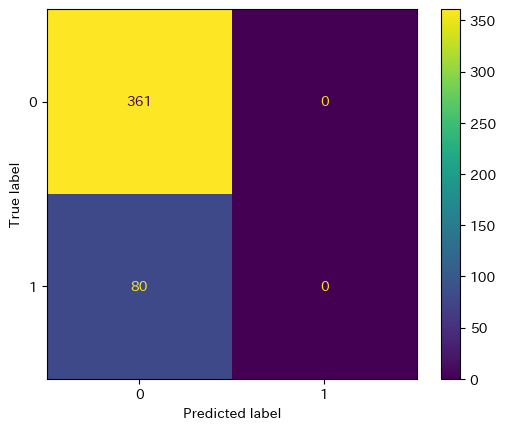

In [43]:
y_pred_baseline = pd.Series([0]*len(y_test))

cm = confusion_matrix(y_test, y_pred_baseline, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [44]:
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       361
           1       0.00      0.00      0.00        80

    accuracy                           0.82       441
   macro avg       0.41      0.50      0.45       441
weighted avg       0.67      0.82      0.74       441



/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

## Logistic Regression

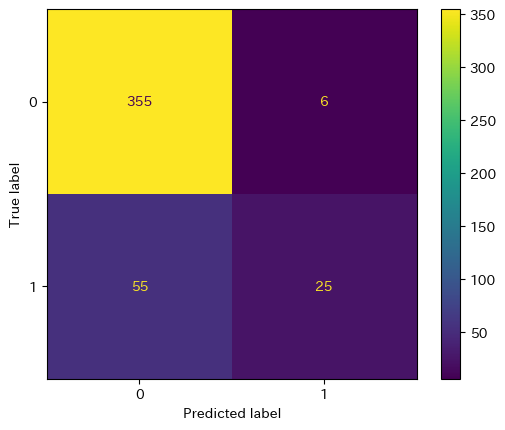

In [45]:
logreg = LogisticRegression(max_iter = 1_000,  # LBFGS Convergence
                            penalty = "l2")    # Default penalty

logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_logreg, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [46]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       361
           1       0.81      0.31      0.45        80

    accuracy                           0.86       441
   macro avg       0.84      0.65      0.69       441
weighted avg       0.86      0.86      0.84       441



## Feature Permutation

In [47]:
from sklearn.inspection import permutation_importance

# Fit model
model = LogisticRegression().fit(X_train_scaled, y_train)

# Performs Permutation
permutation_score = permutation_importance(model, X_test_scaled, y_test,
                                           scoring='accuracy',
                                          random_state=22)

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_test.columns,
                                        permutation_score.importances_mean)).T)
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False)

,feature,score decrease
20,Standard Hours,0.020862
6,Education,0.01678
25,Overtime Hours,0.01542
24,Monthly Working Hours,0.014059
9,Years in Current Position,0.012245
21,Monthly Income,0.011338
3,Marital Status,0.010884
10,Years Since Last Promotion,0.010884
19,Relationship Satisfaction,0.010884
11,Years with Current Manager,0.010431


## Comments

- Standard logistic regression model peformance:
  - **86% accuracy**
  - **Classifies 31% of employees who quit with 81% precision**

# Employee Subset

- let's group employees younger than 40 and compare trends

In [48]:
# make a dataframe of all workers younger than 40 who have stayed at their company for 5+ years
young_loyal = df[(df['Years of Service'] >= 5) & (df['Resignation'] == 0)].drop(columns=['Employee ID', 'Resignation',
                                                                                         'Department', 'Position',
                                                                                         'Field of Study',
                                                                                         'Paid Long Vacation Start Date',
                                                                                         'Paid Long Vacation End Date'])

In [49]:
# make a dataframe of all workers younger than 40 who quit their companies within 5 years
young_quit = df[(df['Years of Service'] < 5) & (df['Resignation'] == 1)].drop(columns=['Employee ID', 'Resignation',
                                                                                         'Department', 'Position',
                                                                                         'Field of Study',
                                                                                         'Paid Long Vacation Start Date',
                                                                                         'Paid Long Vacation End Date'])

In [50]:
subset = pd.DataFrame(young_loyal.mean())

In [51]:
subset[1] = young_quit.mean()

In [52]:
subset['diff'] = subset[0] - subset[1]

In [53]:
subset['percent_diff'] = round((subset[0] - subset[1]) / subset[0] * 100, 2)

In [54]:
subset_columns = ['Age', 'Position Rank', 'Gender', 'Marital Status',
       'Performance Rating', 'Years of Service', 'Education',
       'Years of Experience', 'Training Participation Last Year',
       'Years in Current Position', 'Years Since Last Promotion',
       'Years with Current Manager', 'Number of Job Changes',
       'Business Travel Frequency', 'Commute Distance (km)',
       'Work-Life Balance', 'Job Environment Satisfaction', 'Job Involvement',
       'Job Satisfaction', 'Relationship Satisfaction', 'Standard Hours',
       'Monthly Income', 'Salary Hike Rate', 'Stock Option Level',
       'Monthly Working Hours', 'Overtime Hours', 'Long Vacation']

In [55]:
from scipy.stats import ttest_ind

# Create empty columns for t-statistic and p-value
subset['T-statistic'] = 0.0
subset['P-value'] = 0.0

# Loop through each feature
for feature in subset_columns:
    subset_1 = young_loyal[feature]
    subset_2 = young_quit[feature]

    # Perform t-test
    t_statistic, p_value = ttest_ind(subset_1, subset_2)

    # Assign t-statistic and p-value to respective rows
    subset.loc[feature, 'T-statistic'] = t_statistic
    subset.loc[feature, 'P-value'] = p_value

In [56]:
subset['Significance'] = subset['P-value'].apply(lambda x: 'Yes' if x < .05 else 'No')

In [57]:
subset

,0,1,diff,percent_diff,T-statistic,P-value,Significance
Age,38.259446,30.929078,7.330368,19.16,9.505310,1.631460e-20,Yes
Position Rank,2.367758,1.326241,1.041517,43.99,10.827879,8.081076e-26,Yes
Gender,0.579345,0.666667,-0.087322,-15.07,-1.946457,5.189972e-02,No
Marital Status,1.198992,0.773050,0.425943,35.53,5.494761,5.047930e-08,Yes
Performance Rating,3.163728,3.163121,0.000607,0.02,0.017947,9.856853e-01,No
Years of Service,10.183879,1.765957,8.417922,82.66,16.915434,3.445568e-56,Yes
Education,2.948363,2.723404,0.224958,7.63,2.472088,1.361009e-02,Yes
Years of Experience,13.707809,5.290780,8.417028,61.40,12.728973,2.439580e-34,Yes
Training Participation Last Year,2.842569,2.638298,0.204271,7.19,1.737626,8.260663e-02,No
Years in Current Position,6.185139,0.978723,5.206415,84.18,17.721228,8.634433e-61,Yes


# Conclusion

- By comparing two distinct subsets of employees:
  - **IDEAL** - loyal workers with 5+ years of service without quitting
  - **PROBLEM** - workers with < 5 years of service who quit

- We can see there are significant differences between several features of these groups (*see **'Significance'** column of **Subset** dataframe*)

- There are several factors that may play a significant role in determining whether an employee is "loyal" or not:
  - Overtime, Vacation, Working hours, Stock Option, Monthly Income, Job / Environment Satisfaction, Job Involvement, Business Travel, Promotion, Manager relationship

- It may be useful to survey employees, or target *'at-risk'* employees (employees that the model predicts will quit) and discuss these factors with them.